<a href="https://colab.research.google.com/github/diegodamascenos/diegodamascenos/blob/main/Superstore_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Superstore Sales

## Objetivo do Estudo
Com o intuito de aprimorar e mostrar os conhecimentos que venho adquirindo durante minha jornada de estudos em Data Science, realizei uma análise exploratória e descritiva dos dados de vendas de uma loja fictícia do setor de varejo, cujas vendas são dos anos de 2015 a 2018.<hr>


## Fonte dos Dados
- Todos os dados aqui encontrados, podem ser encontrados no dataset <a href='https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting' target='_blank'>Superstore Sales Dataset</a> do kaggle disponível em:
    - https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting
<hr>



## Tecnologias utilizadas na análise:
<div>
    <img align= "center" alt ="Pyhon" src= https://img.icons8.com/?size=50&id=13441&format=png&color=000000>
    <img align= "center" alt ="Pandas" src= https://img.icons8.com/?size=50&id=xSkewUSqtErH&format=png&color=000000>
    <img align= "center" alt ="Matplotlib" src= https://github.com/user-attachments/assets/bf202433-d354-44c0-9f9d-8de140d61b96>
    <img align= "center" alt ="NumPy" src= https://img.icons8.com/?size=50&id=aR9CXyMagKIS&format=png&color=000000>
</div>
<hr>



#### Análise exploratória dos dados:
#
Sinta-se a vontade para navegar pelos tópicos desta análise para uma melhor compreensão dos dados.
É importante frizar que caso algum código esteja oculto, o motivo é totalmente estético. Isto é, para uma nevegação limpa, ocultei alguns código, mas é possível executá-los. Fique à vontade para isto!  
- 1. **Importando** bibliotecas e dataset
- 2. **Análise inicial e limpeza dos dados**
- 3. **Análise das Vendas**
<hr>

In [1]:
# Bibliotecas para manipulação dos dados
import pandas as pd
import numpy as np

# Bibliotecas EDA
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings

# Biblioteca para manipulação de datas
import datetime as dt

In [2]:
# Importando a base de dados
base = pd.read_csv('train.csv', decimal= ',')


### 2. Análise Inicial e Limpeza do DataFrame
#### 2.1 **Visualizando** as informações da base

In [3]:
# Visualizando a base
base

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376


#### 2.2 Visualizando as informações da base.
Ao importar a base, é necessário a conferência de algumas informações, para identificação de valores nulos ou inconsistentes no DataFrame, tipo de dados (Dtype) e colunas, a fim de realizar a substituição destes valores nulos, por valores reais e conclusivos. <br>
Para isto, é usado o <strong>.info()</strong>, para visualização das informações de forma descritiva do DataFrame.

In [4]:
# Verificando informações da base
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   object 
dtypes: float

#### 2.3 Tratando valores Nulos
Ao filtrar as informações da base, foi indentificado que existem valores nulos na coluna 'Postal Code', os quais devem ser substituídos para garantir a qualidade e confiabilidade do DataFrame. <br>
Mas antes, é fundamental entender os valores nulos da coluna e gerar um resultado acertivo na análise, a fim de minimizar erros na alteração de dados que possam ser importantes e relevantes.

**Filtrando linhas com valores nulos 'NaN'**

In [5]:
# Verificando a coluna Postal Code onde todas as linhas estão com valores ausentes
base[base['Postal Code'].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.2
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


É possível observar que a cidade (City) de Burlington, do estado (State) de Vermont é onde se concentram estes valores nulos. Mas ao analisar o DataFrame é necessário entender se existe algum registro de Burlington/Vermont com Postal Code, para não haver erros no tratamento destes dados.

In [6]:
# Verificando se existe algum registro de Burlington, Vermont com Postal Code.
base[(base.City == 'Burlington') & (base.State == 'Vermont')]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.2
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [7]:
# Verificando os valores não nulos do Postal Code da cidade de Burlington, Vermont
base[
    (base.City == 'Burlington') &
        (base.State == 'Vermont') &
            (base['Postal Code'].notnull())
    ]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales


A primeira concluão é que, não existem informações de **Postal Code** na cidade de **Burlington**, **Vermont**. Logo, é necessário realizar a substituição destes valores, para garantir a qualidade e congruência dos nossos dados.

Antes da substituíção, é observado o Postal Code da cidade de Burlington, Vermont, na imagem abaixo. Este Postal Code será utilizado como referência para as análises futuras.

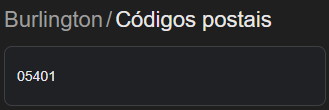

In [8]:
# Substituindo valores Nulos com informação
base.loc[
    (base.City == 'Burlington') &
        (base.State == 'Vermont') &
            (base['Postal Code'].isnull()),
                'Postal Code']= 5401

**Valores nulos substituídos pelo Postal Code da cidade de Burlington, após uma busca na internet.**
- Observe que os valores do Postal Code foram preenchidos com valores reais, o que mantém a confiabilidade dos nossos dados.

In [9]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   object 
dtypes: float

#### 2.4 Convertendo tipos de dados
As datas no formato object(string). Ou seja, estão forma de texto. Para começar a fazer análises temporais, em busca de resultados anuais e mensais, foi necessário fazer a conversão destes dados para formato de data, utilizando a biblioteca **datetime**. Isso permite fazer análises concisas acerca das datas registradas no DataFrame.

In [10]:
# Convertendo as colunas de datas para datetime
base['Ship Date'] = pd.to_datetime(base['Ship Date'], format = '%d/%m/%Y')
base['Order Date'] = pd.to_datetime(base['Order Date'], format = '%d/%m/%Y')

In [11]:
# Visualizando os resultados
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9800 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

A fim de analisar os resultados de vendas, é necessário a conversão da coluna 'Sales' para float(), para realizar análises numéricas onde envolva o desempenho das vendas de acordo com os meses e anos.

In [12]:
# Convertendo a coluna Sales para float
base['Sales'] = base['Sales'].astype(float)

In [13]:
# VIsualizando o resultado
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9800 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

### 3. Análise de Vendas
Após realizar efetivamente o tratamento e a limpeza para manter a qualidade e legibilidade dos dados, o próximo passo é a realização das análises no DataFrame, buscando responder sobre o desempenho das vendas por ano e por mês. Assim como os produtos que mais tiveram vendas, o período que mais vendeu e assim formular estratégias, a fim de minimizar erros e maximizar as vendas.


#### 3.1 Análise de **Vendas por Ano**

Para analisar o desempenho das vendas conforme os anos, foi preciso criar uma nova coluna de anos (Ano) para visualização dos resultados de vendas por ano, e criar agrupamentos para facilitar a análise e o entendimento dos nossos dados.

In [14]:
# Criando a coluna 'Ano'
base['Ano'] = base['Order Date'].dt.year

In [15]:
# Visualizando o resultado
base.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Ano
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2017


Usando o **.groupby()** para agrupar a soma das vendas por ano.

In [16]:
# Agrupando a coluna Ano com a coluna Sales e atribuíndo a variável soma_ano
soma_ano = base.groupby('Ano')['Sales'].sum()

O gráfico abaixo tem por finalidade, uma visualização clara e concisa dos dados, e uma forma melhor elaborada de analisar e avaliar os resultados. <br>
 Com este, foi possível chegar a algumas conclusões, como:
- CAGR (Compound Annual Growth Rate) KPI (indicador) utilizado para representar a **taxa de crescimento anual composta**.
- Ano com melhor desempenho de acordo com a análise.
- Ano com o pior desempenho.
- Impaco gerado.
#
#### Resultados apresentados no gráfico:
- Nos resultados das vendas de 2015 a 2016, o gráfico mostra uma queda de em média **2,15%**.
- Já o ano de 2016 em relação ao ano de 2017, houve um crescimento de **14,3%** em média, nas vendas.
- As vendas de 2017 em relação ao ano de 2018, obteve uma média de crescimento de **9,98%**.
- E analisando o cenário geral de vendas, nos anos de 2015 a 2018, houve um de crescimento de **10,7%**.

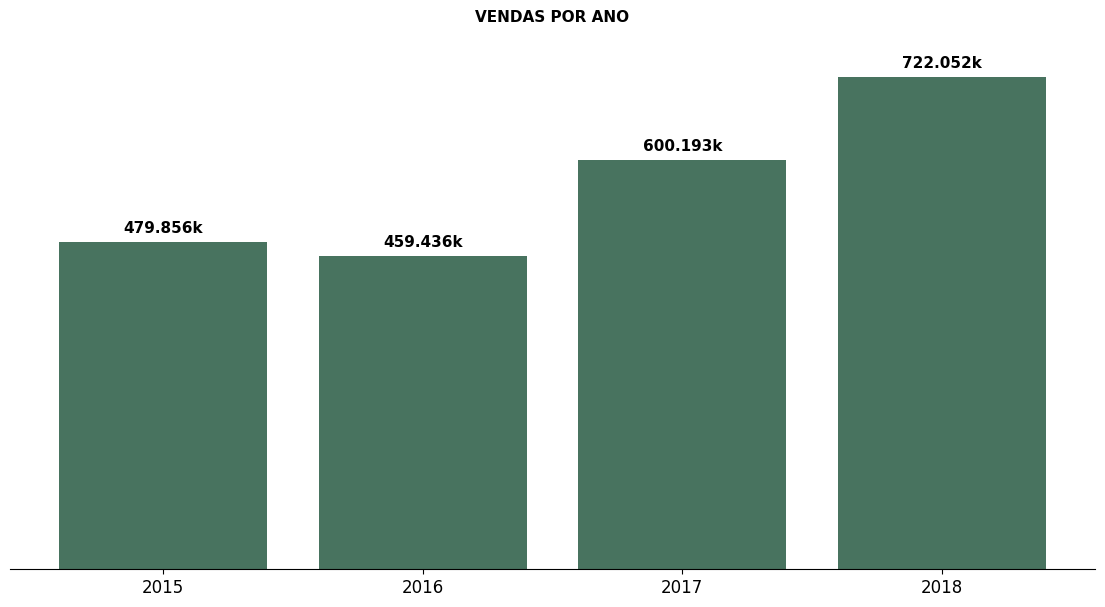

In [18]:
fig, ax = plt.subplots( # Tamanho da figura
    figsize = (14,7)
    )

ax.bar(soma_ano.index,
            soma_ano.values,
                color= '#48735F'   # Cor das barras
    );



ax.set_title('VENDAS POR ANO', # Título do gráfico
                fontsize= 11, # Tamanho da fonte
                    fontweight = 'bold' # Espessura da fonte
            )

# O Annotate é quem vai permitir que a gente coloque rótulo nos dados
for i in np.arange(0,4): # Valores que vão ser mostrados como rótulos, já formatados
    ax.annotate('{:,.0f}k'.format(soma_ano.values[i]).replace(',','.'),  # Valores que vão ser mostrados como rótulos, já formatados
                    (soma_ano.index[i], soma_ano.values[i]), # # Posição (x,y que esses valores vão estar)
                        ha='center', # Alinhamento horizontal do texto
                            va = 'top', # Alinhamento vertical do texto
                                xytext=(0,+15), # Deslocamento em relação ao ponto que o texto estaria
                                    textcoords= 'offset points', # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                                        fontsize = 11, # Tamanho da fonte dos rótulos
                                            fontweight = 'bold' # Espessura da fonte dos rótulos
                )

ax.xaxis.set_ticks([2015, 2016, 2017, 2018]) # Ajustando os valores de x
ax.tick_params(axis='x', labelsize = 12) # Melhorando o visual do eixo x

ax.set_yticks(np.array([0,790000])) # Diminuindo o tamanho das barras para não cortar o rótulo
ax.yaxis.set_visible(False) # Retirando os valores do eixo y

ax.spines['top'].set_visible(False) # Retirando os traços do gráfico
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

#### 3.2. Análise de **Vendas por Mês**
Seguindo o mesmo sentido das análises por anos, foi preciso criar uma nova coluna de meses (Mes) para visualização dos resultados de vendas por mês, e criar agrupamentos para facilitar a análise e o entendimento dos nossos dados.

In [19]:
# Criando a coluna Mes
base['Mes'] = base['Order Date'].dt.month

In [20]:
# Visualizando coluna na base
base.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Ano,Mes
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2017,11


Usando o **.groupby()** para agrupar a soma das vendas por mês e ano.

In [21]:
#Agrupando as colunas mês e ano, a venda, e criando variável de soma mês
soma_mes = base.groupby(['Mes', 'Ano'])['Sales'].sum()

Obsevação: Usando o **.reset_index()**, pode redefinir o índice do DataFrame, devido às operações realizadas, fazendo com que o índice não seja mais sequencial, e sim, um **MultiIndex**. Esse método ajuda a restabelecer um índice limpo e novamente sequencial.

In [22]:
# Resetando o índice do data frame
soma_mes = soma_mes.reset_index()

No DataFrame abaixo, é possível visualizar o montante de vendas dos meses em sequência, percorrendo pelos anos de 2015 a 2018.

In [23]:
# Visualizando o resultado do índice restabelecido
soma_mes.head(10)

,Mes,Ano,Sales
0,1,2015,14205.7070
1,1,2016,18066.9576
2,1,2017,18542.4910
3,1,2018,43476.4740
4,2,2015,4519.8920
5,2,2016,11951.4110
6,2,2017,22978.8150
7,2,2018,19920.9974
8,3,2015,55205.7970
9,3,2016,32339.3184


Embora a análise anterior apresentada no gráfico tenha obtido resultados importantes como, a taxa composta de crescimento anual, o comparativo no desempenho das vendas nos anos de 2015 a 2018, também é representado o ano com melhor desempenho nas vendas, e ano com desempenho inferior, e além do impacto destes resultados.

Abaixo, destaca-se o comparativo das vendas de Janeiro a Dezembro, durante os quatro anos registrados.

Com o gráfico apresentado, conclui-se que de fato, o ano de 2017 e 2018 obtiveram resultados excepcionais, e 2018 figurando neste cenário como o ano com a maior média de vendas por mês.

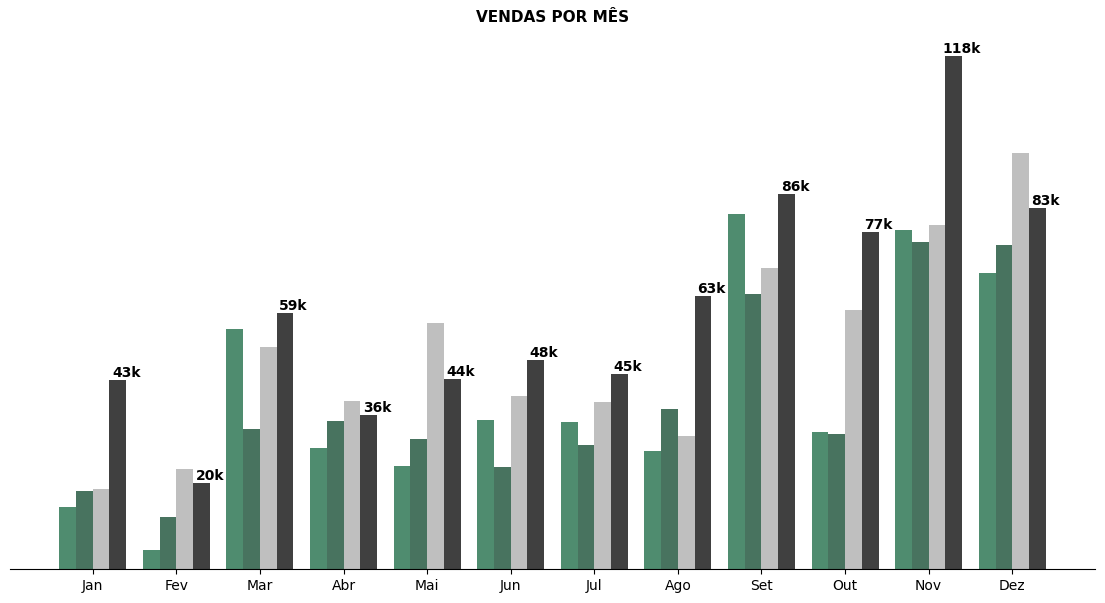

In [35]:
fig,ax = plt.subplots(
            figsize = (14,7) # Tamanho da figura
        )

wid = 0.2 # Tamanho das barras

ax.set_title('VENDAS POR MÊS', # Título do Gráfico
                fontsize= 11,
                    fontweight = 'bold'
            )

ax.bar(soma_mes[soma_mes.Ano == 2015].Mes.values-wid-wid/2, # Ajuste da posição das barras
        soma_mes[soma_mes.Ano == 2015].Sales.values,
            color="#4F8C6F", # Cor das barras
                label = 2015, # Rótulo das barras
                    width=wid # Largura das barras
        )

ax.bar(soma_mes[soma_mes.Ano == 2016].Mes.values-wid/2,
        soma_mes[soma_mes.Ano == 2016].Sales.values,
            color="#48735F",
                label = 2016, # Cor das barras
                    width=wid
        )

ax.bar(soma_mes[soma_mes.Ano == 2017].Mes.values+wid/2,
        soma_mes[soma_mes.Ano == 2017].Sales.values,
            color="#BFBFBF", # Cor das barras
                label = 2017,
                    width=wid
        )

ax.bar(soma_mes[soma_mes.Ano == 2018].Mes.values+wid+wid/2,
        soma_mes[soma_mes.Ano == 2018].Sales.values,
            color='#404040', # Cor das barras
                label = 2018,
                    width=wid
        )

for i in np.arange(0,12): # Adicionando o rótulo dos dados para 2018
    ax.annotate('{:,.0f}k'.format(soma_mes[soma_mes.Ano == 2018].Sales.values[i]/1000), # Valores que vão ser mostrados como rótulos, já formatados
                (soma_mes[soma_mes.Ano == 2018].Mes.values[i]+wid+wid/2,
                    soma_mes[soma_mes.Ano == 2018].Sales.values[i]), # Posição (x,y que esses valores vão estar)
                        ha='center', # Alinhamento horizontal do texto
                            va='top', # Alinhamento vertical do texto
                                xytext= (6,10), # Deslocamento em relação ao ponto que o texto estaria
                                    textcoords='offset points', # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                                        fontsize = 10, # Tamanho da fonte dos rótulos
                                            fontweight = 'bold' # Espessura da fonte dos rótulos
    )

ax.yaxis.set_visible(False)

ax.spines['top'].set_visible(False) # Retirando os traços do gráfico
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.set_ticks(np.arange(1, 13)) # Ajustando os valores de x
ax.set_xticklabels(['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'])
ax.tick_params(axis='x',labelsize=10) # Melhorando o visual do eixo x

plt.show()

#### 3.3. Análise de **Categoria mais Vendida**

Com as análises de vendas por Ano e Mês concluídas e insights gerados, é importante a análise de outros indicadores.
#
Por se tratar de vendas, existe a necessidade de analisar como cada categoria reage ao mercado. <br> A fim de estipular metas e formular estratégias, e minimizar erros de investimento (tempo ou capital), é apresentado abaixo a análise de vendas por categorias, indicando o desempenho de cada uma delas.

In [38]:
#Visualizando a base e a coluna categoria
base.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Ano,Mes
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2017,11
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,2017,11


Abaixo, é representado o total de vendas por categoria nos anos de 2015 a 2018.

In [37]:
# Visualizando o total de vendas das categorias por ano
base.groupby(['Category', 'Ano'])['Sales'].sum()

Category         Ano 
Furniture        2015    156477.8811
                 2016    164053.8674
                 2017    195813.0400
                 2018    212313.7872
Office Supplies  2015    149512.8200
                 2016    133124.4070
                 2017    182417.5660
                 2018    240367.5410
Technology       2015    173865.5070
                 2016    162257.7310
                 2017    221961.9440
                 2018    269370.6910
Name: Sales, dtype: float64

Da mesma forma como foram utilizadas variáveis nas análises anteriores, e restabelecimento do índice para uma visualização mais limpa, neste cenário de vendas por categoria, também faz-se necessário o uso destes parâmetros para uma análise mais concisa e coerente com a forma como foi analisado até aqui, mantendo a qualidade, confiabilidade e legibilidade dos dados.

In [40]:
# Declarando variável e resetando o índice do DataFrame
categoria = base.groupby(['Category', 'Ano'])['Sales'].sum()
categoria = categoria.reset_index()
categoria

,Category,Ano,Sales
0,Furniture,2015,156477.8811
1,Furniture,2016,164053.8674
2,Furniture,2017,195813.0400
3,Furniture,2018,212313.7872
4,Office Supplies,2015,149512.8200
5,Office Supplies,2016,133124.4070
6,Office Supplies,2017,182417.5660
7,Office Supplies,2018,240367.5410
8,Technology,2015,173865.5070
9,Technology,2016,162257.7310


O gráfico elaborado abaixo, possui os indicadores de desempenho das vendas por categoria.
#
Neste contexto, é possível concluir que os artigos de tecnologia mantiveram a melhor média de vendas durante os anos analisados, liderando o cenário das vendas, indicando uma alta demanda de produtos desta categoria.
#
**Indicativos do gráfico:**
- O gráfico apresenta um declínio de vendas em todas as categorias no ano de 2016, em relação ao ano anterior e posteriores.
- Neste ano, a categoria mais vendida foram os móveis (artigos para casa), com faturamento na casa de R$ 164.000,00, porém, ainda abaixo do ano anterior.
- Já em 2017 e 2018, os artigos de tecnologia voltaram a liderar as vendas por categorias, com um enorme salto e uma ampla vantagem as demais categorias.
#
Sendo assim, é recomendável o entendimento destas vendas, e  sanar dúvidas e questionamentos pertinentes, como:
- Quais os produtos mais vendidos?
- Quais serão as estratégias traçadas para aumentar as vendas das demais categorias?
#
E neste mesmo contexto, é possível recomendar mais ações de marketing e um maior investimento nos artigos de tecnologia, pois a tendência apresentada no gráfico, indica que as vendas deverão ter um desempenho ainda melhor nos anos posteriores.   

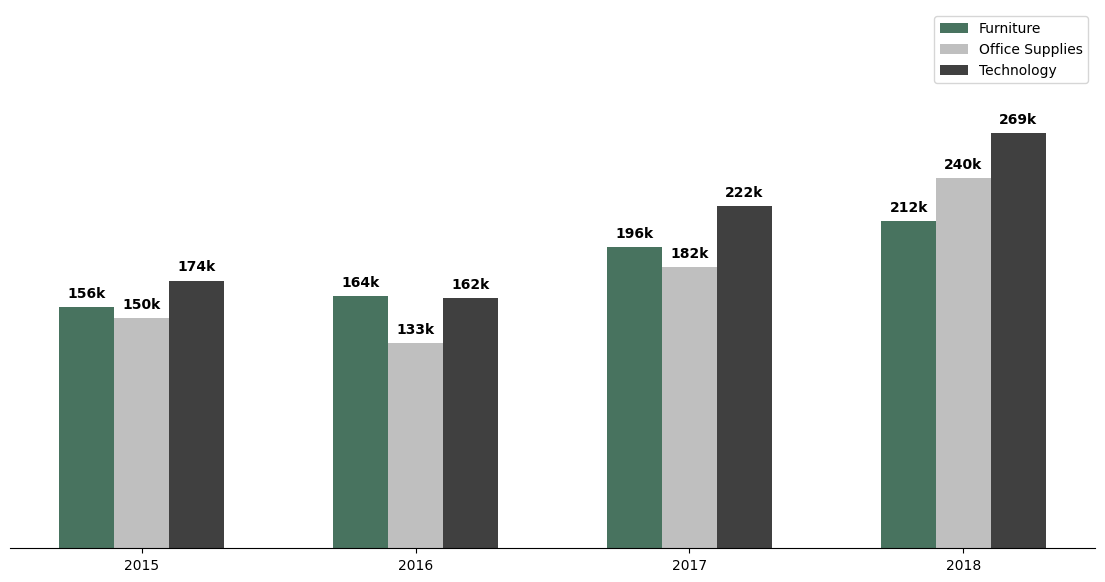

In [41]:
fig,ax = plt.subplots(figsize = (14,7)) # Tamanho da figura

wid = 0.2

ax.bar(categoria[categoria.Category == 'Furniture'].Ano.values-wid,
        categoria[categoria.Category == 'Furniture'].Sales.values,
            color="#48735F", # Cor das barras
                label = 'Furniture',
                    width=wid
        )

ax.bar(categoria[categoria.Category == 'Office Supplies'].Ano.values,
        categoria[categoria.Category == 'Office Supplies'].Sales.values,
            color="#BFBFBF", # Cor das barras
                label = 'Office Supplies',
                    width=wid
        )

ax.bar(categoria[categoria.Category == 'Technology'].Ano.values+wid,
        categoria[categoria.Category == 'Technology'].Sales.values,
            color="#404040", # Cor das barras
                label = 'Technology',
                    width=wid
        )

for i in np.arange(0,4):
    ax.annotate('{:,.0f}k'.format(categoria[categoria.Category == 'Furniture'].Sales.values[i]/1000),
                    (categoria[categoria.Category == 'Furniture'].Ano.values[i]-wid,
                        categoria[categoria.Category == 'Furniture'].Sales.values[i]),
                            ha='center',
                                va='top',
                                    xytext=(0,15),
                                        textcoords='offset points',
                                            fontsize = 10,
                                                fontweight = 'bold'
        )

for i in np.arange(0,4):
    ax.annotate('{:,.0f}k'.format(categoria[categoria.Category == 'Office Supplies'].Sales.values[i]/1000),
                    (categoria[categoria.Category == 'Office Supplies'].Ano.values[i],
                        categoria[categoria.Category == 'Office Supplies'].Sales.values[i]),
                            ha='center',
                                va='top',
                                    xytext=(0,15),
                                        textcoords='offset points',
                                            fontsize = 10,
                                                fontweight = 'bold'
        )

for i in np.arange(0,4):
    ax.annotate('{:,.0f}k'.format(categoria[categoria.Category == 'Technology'].Sales.values[i]/1000),
                    (categoria[categoria.Category == 'Technology'].Ano.values[i]+wid,
                        categoria[categoria.Category == 'Technology'].Sales.values[i]),
                            ha='center',
                                va='top',
                                    xytext=(0,15),
                                        textcoords='offset points',
                                            fontsize = 10,
                                                fontweight = 'bold'
        )

ax.set_yticks(np.array([0,350000]))
ax.yaxis.set_visible(False)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.set_ticks(np.arange(2015, 2019))
ax.tick_params(axis= 'x', labelsize = 10)

ax.legend()
plt.show()

#### 3.4. Análise de **Produto mais Vendido**
#
A seguinte análise, tem por finalidade entender o desempenho das vendas dos produtos ofertados, a fim de minimizar erros de investimentos e propagandas para com produtos obsoletos e que já não se vendem mais. Também é possível gerar soluções que buscam potencializar as vendas daqueles que possuem uma alta demanda. <br>
Estes são aspectos importantes para o cenário comercial, e as respostas só serão encontradas nas observações feitas a respeito destes dados. Ou seja, dividindo a análise de vendas de produtos por partes.
#
- Primeiramente a análise dos produtos mais vendidos.
- Posteriormente, uma análise dos produtos mais vendidos por ano.


In [44]:
# Visualizando a base
base.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Ano,Mes
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2017,11
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,2017,11


Abaixo, é representado o total de vendas por categoria nos anos de 2015 a 2018.

Seguindo a mesma lógica, será necessário a criação de uma nova variável para visualizar os itens mais vendidos, e restabelecer o índice para uma visualização sequencial do DataFrame novamente.
#
Além do uso do **.reset_index()**, deveremos ordenar o DataFrame usando **.sort_values()** como parâmetro de ordenação, já que queremos visualizar os produtos mais vendidos.

In [45]:
itens = base.groupby('Product Name')['Sales'].sum() # Declarando e agrupando valores da variável
itens = itens.reset_index() # Resetando o indice
itens = itens.sort_values('Sales', ascending=False) # Ordenando o DataFrame através da coluna Sales
itens.head(10) # Visualizando a base

,Product Name,Sales
404,Canon imageCLASS 2200 Advanced Copier,61599.824
649,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
444,Cisco TelePresence System EX90 Videoconferenci...,22638.480
785,HON 5400 Series Task Chairs for Big and Tall,21870.576
685,GBC DocuBind TL300 Electric Binding System,19823.479
687,GBC Ibimaster 500 Manual ProClick Binding System,19024.500
804,Hewlett Packard LaserJet 3310 Copier,18839.686
786,HP Designjet T520 Inkjet Large Format Printer ...,18374.895
682,GBC DocuBind P400 Electric Binding System,17965.068
812,High Speed Automatic Electric Letter Opener,17030.312


Criando uma **variável móvel** para os itens, poderá filtrar o número de produtos suficientes para uma boa visualização. Isto é, mudando o valor da variável, também é possível mudar a visualização do número de produtos mostrados no gráfico. Esta é uma alternativa a entrada de dados.

No DataFrame abaixo, é possível visualizar as informações dos produtos mais vendidos.

In [46]:
n = 10 # Variável móvel
top_itens = itens.head(n) # Declarando a variável top_itens com o DataFrame 'Itens'
top_itens # Visualizando resultado

,Product Name,Sales
404,Canon imageCLASS 2200 Advanced Copier,61599.824
649,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
444,Cisco TelePresence System EX90 Videoconferenci...,22638.480
785,HON 5400 Series Task Chairs for Big and Tall,21870.576
685,GBC DocuBind TL300 Electric Binding System,19823.479
687,GBC Ibimaster 500 Manual ProClick Binding System,19024.500
804,Hewlett Packard LaserJet 3310 Copier,18839.686
786,HP Designjet T520 Inkjet Large Format Printer ...,18374.895
682,GBC DocuBind P400 Electric Binding System,17965.068
812,High Speed Automatic Electric Letter Opener,17030.312


O gráfico abaixo tem por finalidade apresentar os produtos mais vendidos nos registros de 2015 a 2018.

As análises anteriores trouxeram insights, e é possível observar que os produtos das categorias de tecnologia possuem uma grande demanda no mercado, e uma preferência dos clientes por estes.

Ao visualizar o gráfico, é possível concluir que estes itens apresentados possuem o maior índice de vendas. Porém, ainda não é o suficiente para chegar a conclusões, pois estes produtos foram vendidos no período de quatro anos, e não é possível confirmar somente com esta análise, se houve um bom desempenho destes durante todos os quatro anos. <br>
A única conclusão que se chega é que os produtos da categoria de tecnologia desempenham papel fundamental no cenário das vendas, o que pode levar a recomendações de campanhas de marketing e investimentos para esta categoria. <br>
Mas ainda é necessário entender algumas coisas como:
- Quais produtos mais venderam em 2015, 2016, 2017 ou 2018?
- Qual produto vendeu durante todos os anos, e qual vendeu em um só ano?

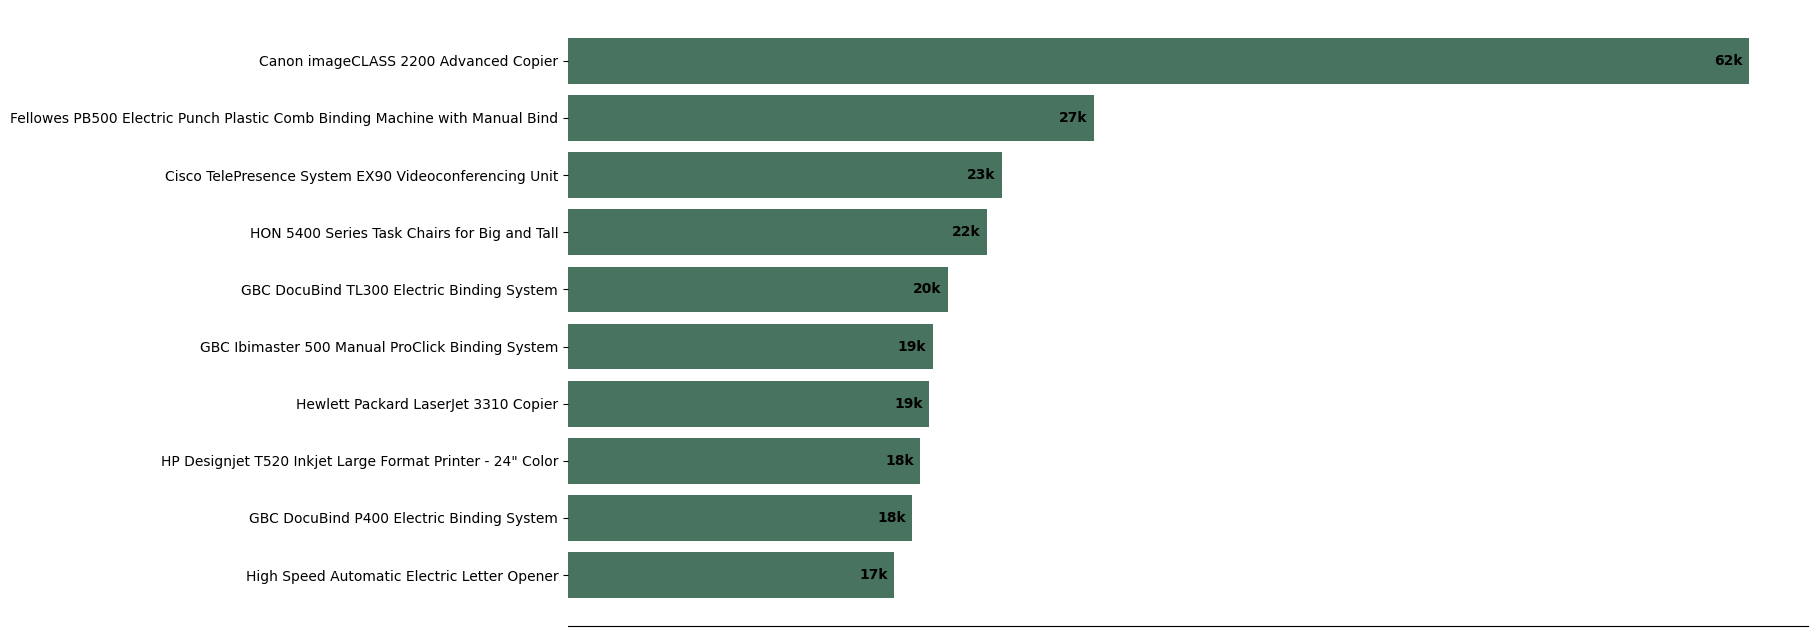

In [47]:
fig, ax = plt.subplots(figsize = (16,8))

ax.barh(top_itens['Product Name'].values,
                top_itens['Sales'].values,
                        align= 'center',
                                color= '#48735F'
        )

for i in np.arange(0,n):
        ax.annotate('{:,.0f}k'.format(top_itens['Sales'].values[i]/1000),
                (top_itens['Sales'].values[i],
                        i),
                        ha='center',
                                va='top',
                                        xytext=(-15,5),
                                                textcoords='offset points',
                                                        fontsize = 10,
                                                                fontweight = 'bold'
)



ax.invert_yaxis()

ax.xaxis.set_visible(False)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

#### 3.4.1. Análise de **Produtos mais vendidos por Ano**
#
Conforme observado acima, existe a necessidade de analisar e concluir quais os produtos que tiveram bons desempenhos de vendas durante todos os anos, ou, que tiveram bons desempenhos somente em um ano específico, ou até mesmo qual foi o ano deste bom desempenho. <br>
Isto se faz necessário devido ao impacto que geraria um investimento em um produto que já não vende mais, ou tem um retorno abaixo do investimento. Esta abordagem leva em consideração a avaliação de quais serão as estratégias adotadas no intuito de maximizar as vendas dos produtos que com maior demanda durante todos os anos, e aqueles que venderam no último ano em diante. Para assim, distingui-los dos produtos que não tem mais um bom desempenho de vendas.

In [48]:
#Visualizando a base
base.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Ano,Mes
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2017,11
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,2017,11


Agrupando por Produtos e Anos, a fim de estabelecer resultados para a variável que será usada para explorar e analisar os dados de forma clara e concisa:


In [49]:
# Agrupando por produtos e ano
itens_ano = base.groupby(['Product Name', 'Ano'])['Sales'].sum()
itens_ano = itens_ano.reset_index() # Redefinindo o índice
itens_ano # Visualizando o DataFrame

,Product Name,Ano,Sales
0,"""While you Were Out"" Message Book, One Form pe...",2018,25.228
1,"#10 Gummed Flap White Envelopes, 100/Box",2016,6.608
2,"#10 Gummed Flap White Envelopes, 100/Box",2017,24.780
3,"#10 Gummed Flap White Envelopes, 100/Box",2018,9.912
4,#10 Self-Seal White Envelopes,2017,86.502
...,...,...,...
5269,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,2018,205.086
5270,netTALK DUO VoIP Telephone Service,2015,335.936
5271,netTALK DUO VoIP Telephone Service,2016,230.956
5272,netTALK DUO VoIP Telephone Service,2017,377.928


Através deste DataFrame, é possível visualizar uma informação extremamente impactante para o negócio: O terceiro item mais vendido, na realidade foi vendido somente no ano de 2015, e em grande volume de vendas. De tal forma que aparece até então como terceiro item mais vendido da loja, nestes quatro anos.

Por isso é a importância avaliar como tem sido as vendas destes produtos nos anos de 2015 a 2018, para minimizar qualquer movimento que possa prejudicar de certa forma, o retorno financeiro que a empresa projetou.  

In [50]:
# Visualizando produtos da variável de produtos mais vendidos
itens_ano[itens_ano['Product Name'] == top_itens.iloc[2,0]]

,Product Name,Ano,Sales
1270,Cisco TelePresence System EX90 Videoconferenci...,2015,22638.48


Para a visualização dos dados, de forma que seja mostrado as Vendas, Produtos e Anos, é necessário criar um DataFrame com estes dados. Para isto, é utilizado o <font color = 'red'>.merge()</font> para juntar duas ou mais bases, e relacioná-las através de colunas em comum.

Primeiramente, a criação de um DataFrame contendo as datas:

In [51]:
df_datas = pd.DataFrame ([2018, 2017, 2016, 2015]) # Declarando variável que será utilizada como DataFrame de datas
df_datas.columns = ['Ano'] # Atribuíndo a coluna 'Ano'
df_datas # Visualizando resultado

,Ano
0,2018
1,2017
2,2016
3,2015


Criando coluna para relacionar as bases que serão usadas:

In [52]:
# Criando novas colunas para os DataFrames abaixo
df_datas['uniao'] = 'unir'
itens['uniao'] = 'unir'

In [54]:
n = 10
top_itens = itens.head(n)

Usando o <font color = 'red'> .merge()</font> para relacionar os DataFrames.

In [55]:
produto_ano = pd.merge( # Variável que armazenará a relação entre as bases
    top_itens, # Referência
        df_datas, # Segunda base
            how= 'outer', # tipo de relação
                on= 'uniao' # coluna relacional
)

produto_ano.head()

,Product Name,Sales,uniao,Ano
0,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2018
1,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2017
2,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2016
3,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2015
4,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384,unir,2018


Relacionando o DataFrame **produto_ano**, onde contém as informações de produtos, com o DataFrame onde tem as informações de vendas destes produtos:

In [56]:
itens_grafico = pd.merge( # Variável que armazenará a relação entre as bases
    produto_ano, # Referência
        itens_ano, # Segunda base
            how='left', # tipo de relação
                on = ['Product Name', 'Ano'] # colunas relacionais
)

itens_grafico.head()

,Product Name,Sales_x,uniao,Ano,Sales_y
0,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2018,35699.898
1,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2017,25899.926
2,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2016,NaN
3,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2015,NaN
4,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384,unir,2018,7371.742


Abaixo, é possível resumir as informações em um gráfico, detalhando os resultados das vendas de produtos, e seus respectivos desempenhos durante os anos de 2015 a 2018.

É possível visualiazar através do gráfico que, entre os produtos mais vendidos, existem também produtos que foram vendidos em apenas um ano, e até mesmo, produtos vendidos somente no primeiro ano da análise.

Deste modo, é possível chegar a conclusões do desempenho de vendas, dos produtos mais vendidos durante todos os anos analisados. <br>
Diante do que mostra o gráfico, as conclusões são:
- O terceiro produto representado no gráfico, vendeu somente no ano de 2015.
- O segundo produto em questão vendeu em grande escala, e é possível notar uma tendência de mercado.
- Já o primeiro produto apresentado no gráfico, se mostra como forte tendência de mercado.

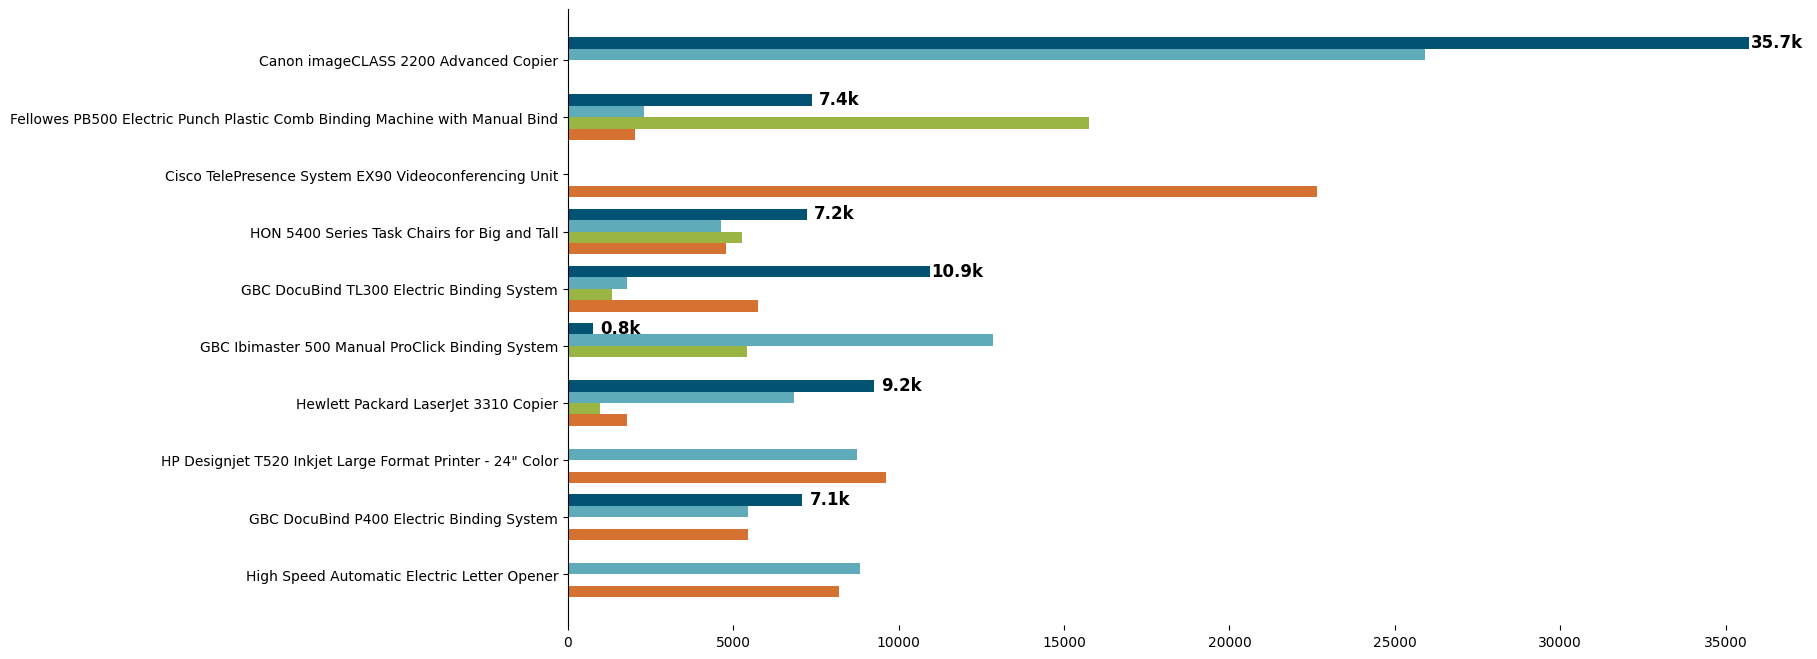

In [58]:
fig, ax = plt.subplots(figsize = (16,8))

hgt = 0.2
qtd_itens = len(top_itens)

ax.barh(np.arange(0, qtd_itens)-hgt-hgt/2,
                itens_grafico[itens_grafico.Ano == 2018].Sales_y.values,
                        align= 'center',
                                color= '#025373',
                                        height=hgt,
                                                label = 2018
        )

ax.barh(np.arange(0, qtd_itens)-hgt/2,
                itens_grafico[itens_grafico.Ano == 2017].Sales_y.values,
                        align= 'center',
                                color= '#60ABB9',
                                        height=hgt,
                                                label = 2017
        )

ax.barh(np.arange(0, qtd_itens)+hgt/2,
                itens_grafico[itens_grafico.Ano == 2016].Sales_y.values,
                        align= 'center',
                                color= '#9BB544',
                                        height=hgt,
                                                label = 2016
        )

ax.barh(np.arange(0, qtd_itens)+hgt+hgt/2,
                itens_grafico[itens_grafico.Ano == 2015].Sales_y.values,
                        align= 'center',
                                color= '#D67231',
                                        height=hgt,
                                                label = 2015
        )

for i in np.arange(0,qtd_itens):
                ax.annotate('{:,.1f}k'.format(itens_grafico[itens_grafico.Ano == 2018].Sales_y.values[i]/1000),
                        (itens_grafico[itens_grafico.Ano == 2018].Sales_y.values[i],i-hgt-hgt/2),
                                ha="center", va="top",
                                        xytext=(20,7),
                                                textcoords="offset points",
                                                        fontsize=12,
                                                                fontweight='bold'
                )

ax.yaxis.set_ticks(np.arange(0,qtd_itens)) # Ajustando os valores de x
ax.set_yticklabels(top_itens["Product Name"]) # Colocando rótulo no meu eixo
ax.tick_params(axis='y',labelsize=10)

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.invert_yaxis()

plt.show()

#### Resumo gráfico das Análises:

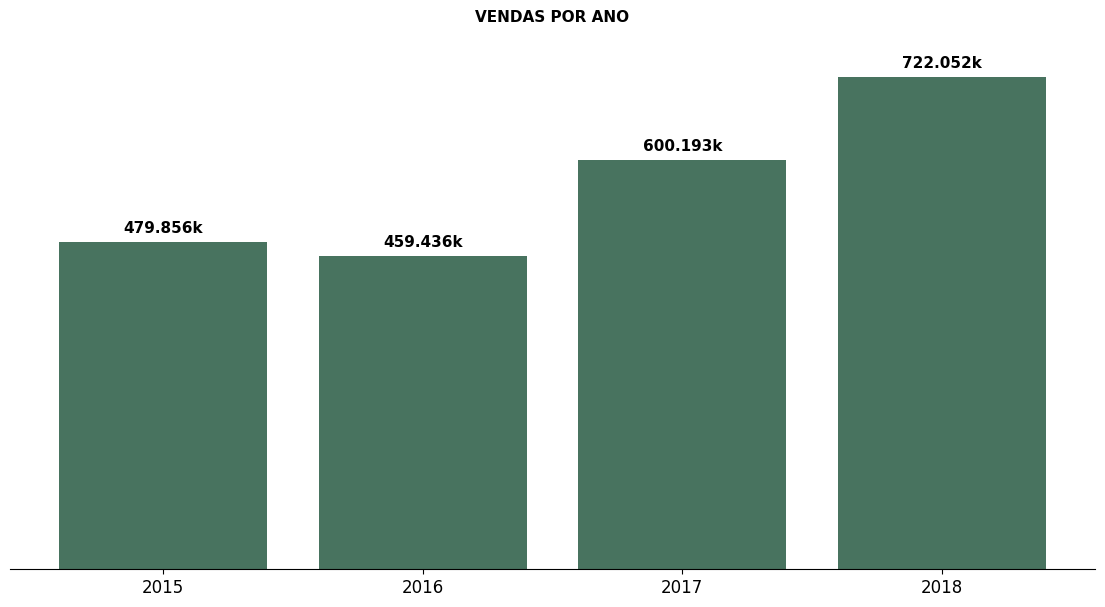

In [66]:
# @title Texto de título padrão
fig, ax = plt.subplots( # Tamanho da figura
    figsize = (14,7)
    )

ax.bar(soma_ano.index,
            soma_ano.values,
                color= '#48735F'   # Cor das barras
    );



ax.set_title('VENDAS POR ANO', # Título do gráfico
                fontsize= 11, # Tamanho da fonte
                    fontweight = 'bold' # Espessura da fonte
            )

# O Annotate é quem vai permitir que a gente coloque rótulo nos dados
for i in np.arange(0,4): # Valores que vão ser mostrados como rótulos, já formatados
    ax.annotate('{:,.0f}k'.format(soma_ano.values[i]).replace(',','.'),  # Valores que vão ser mostrados como rótulos, já formatados
                    (soma_ano.index[i], soma_ano.values[i]), # # Posição (x,y que esses valores vão estar)
                        ha='center', # Alinhamento horizontal do texto
                            va = 'top', # Alinhamento vertical do texto
                                xytext=(0,+15), # Deslocamento em relação ao ponto que o texto estaria
                                    textcoords= 'offset points', # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                                        fontsize = 11, # Tamanho da fonte dos rótulos
                                            fontweight = 'bold' # Espessura da fonte dos rótulos
                )

ax.xaxis.set_ticks([2015, 2016, 2017, 2018]) # Ajustando os valores de x
ax.tick_params(axis='x', labelsize = 12) # Melhorando o visual do eixo x

ax.set_yticks(np.array([0,790000])) # Diminuindo o tamanho das barras para não cortar o rótulo
ax.yaxis.set_visible(False) # Retirando os valores do eixo y

ax.spines['top'].set_visible(False) # Retirando os traços do gráfico
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

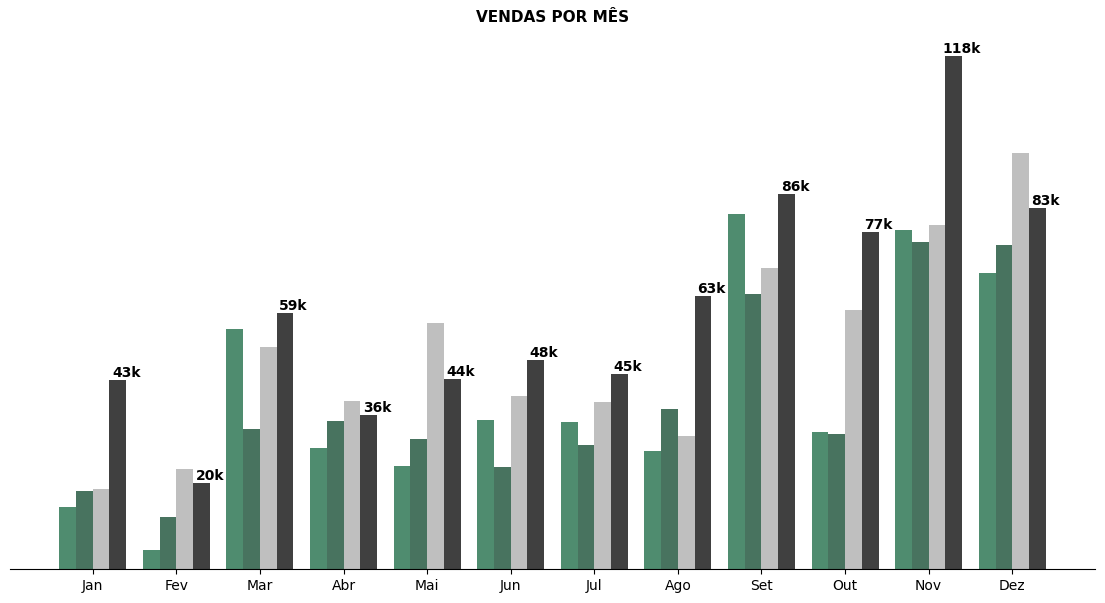

In [61]:
# @title Texto de título padrão
fig,ax = plt.subplots(
            figsize = (14,7) # Tamanho da figura
        )

wid = 0.2 # Tamanho das barras

ax.set_title('VENDAS POR MÊS', # Título do Gráfico
                fontsize= 11,
                    fontweight = 'bold'
            )

ax.bar(soma_mes[soma_mes.Ano == 2015].Mes.values-wid-wid/2, # Ajuste da posição das barras
        soma_mes[soma_mes.Ano == 2015].Sales.values,
            color="#4F8C6F", # Cor das barras
                label = 2015, # Rótulo das barras
                    width=wid # Largura das barras
        )

ax.bar(soma_mes[soma_mes.Ano == 2016].Mes.values-wid/2,
        soma_mes[soma_mes.Ano == 2016].Sales.values,
            color="#48735F",
                label = 2016, # Cor das barras
                    width=wid
        )

ax.bar(soma_mes[soma_mes.Ano == 2017].Mes.values+wid/2,
        soma_mes[soma_mes.Ano == 2017].Sales.values,
            color="#BFBFBF", # Cor das barras
                label = 2017,
                    width=wid
        )

ax.bar(soma_mes[soma_mes.Ano == 2018].Mes.values+wid+wid/2,
        soma_mes[soma_mes.Ano == 2018].Sales.values,
            color='#404040', # Cor das barras
                label = 2018,
                    width=wid
        )

for i in np.arange(0,12): # Adicionando o rótulo dos dados para 2018
    ax.annotate('{:,.0f}k'.format(soma_mes[soma_mes.Ano == 2018].Sales.values[i]/1000), # Valores que vão ser mostrados como rótulos, já formatados
                (soma_mes[soma_mes.Ano == 2018].Mes.values[i]+wid+wid/2,
                    soma_mes[soma_mes.Ano == 2018].Sales.values[i]), # Posição (x,y que esses valores vão estar)
                        ha='center', # Alinhamento horizontal do texto
                            va='top', # Alinhamento vertical do texto
                                xytext= (6,10), # Deslocamento em relação ao ponto que o texto estaria
                                    textcoords='offset points', # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                                        fontsize = 10, # Tamanho da fonte dos rótulos
                                            fontweight = 'bold' # Espessura da fonte dos rótulos
    )

ax.yaxis.set_visible(False)

ax.spines['top'].set_visible(False) # Retirando os traços do gráfico
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.set_ticks(np.arange(1, 13)) # Ajustando os valores de x
ax.set_xticklabels(['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'])
ax.tick_params(axis='x',labelsize=10) # Melhorando o visual do eixo x

plt.show()

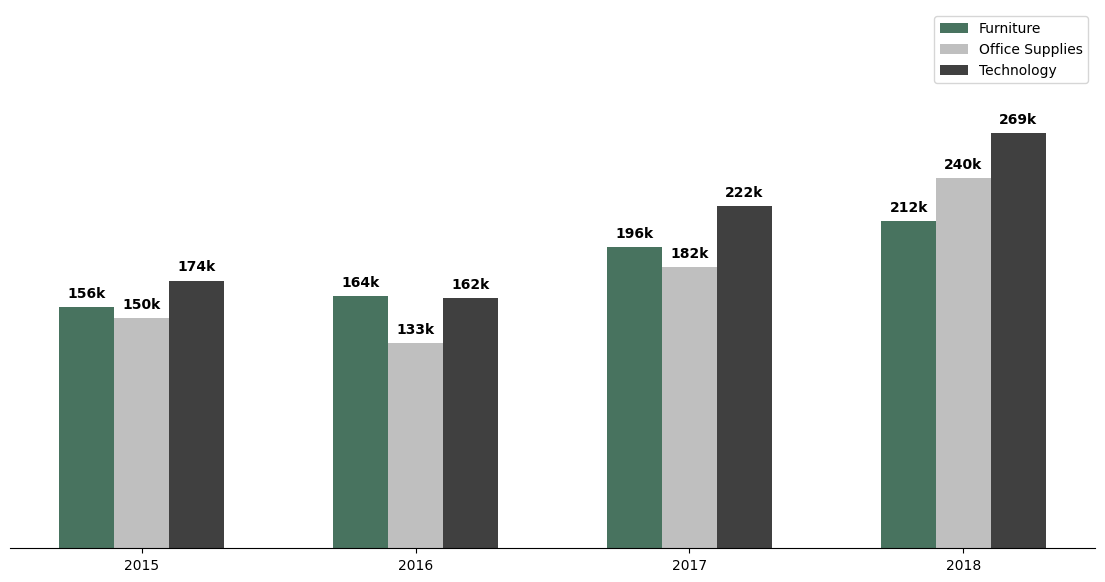

In [62]:
# @title Texto de título padrão
fig,ax = plt.subplots(figsize = (14,7)) # Tamanho da figura

wid = 0.2

ax.bar(categoria[categoria.Category == 'Furniture'].Ano.values-wid,
        categoria[categoria.Category == 'Furniture'].Sales.values,
            color="#48735F", # Cor das barras
                label = 'Furniture',
                    width=wid
        )

ax.bar(categoria[categoria.Category == 'Office Supplies'].Ano.values,
        categoria[categoria.Category == 'Office Supplies'].Sales.values,
            color="#BFBFBF", # Cor das barras
                label = 'Office Supplies',
                    width=wid
        )

ax.bar(categoria[categoria.Category == 'Technology'].Ano.values+wid,
        categoria[categoria.Category == 'Technology'].Sales.values,
            color="#404040", # Cor das barras
                label = 'Technology',
                    width=wid
        )

for i in np.arange(0,4):
    ax.annotate('{:,.0f}k'.format(categoria[categoria.Category == 'Furniture'].Sales.values[i]/1000),
                    (categoria[categoria.Category == 'Furniture'].Ano.values[i]-wid,
                        categoria[categoria.Category == 'Furniture'].Sales.values[i]),
                            ha='center',
                                va='top',
                                    xytext=(0,15),
                                        textcoords='offset points',
                                            fontsize = 10,
                                                fontweight = 'bold'
        )

for i in np.arange(0,4):
    ax.annotate('{:,.0f}k'.format(categoria[categoria.Category == 'Office Supplies'].Sales.values[i]/1000),
                    (categoria[categoria.Category == 'Office Supplies'].Ano.values[i],
                        categoria[categoria.Category == 'Office Supplies'].Sales.values[i]),
                            ha='center',
                                va='top',
                                    xytext=(0,15),
                                        textcoords='offset points',
                                            fontsize = 10,
                                                fontweight = 'bold'
        )

for i in np.arange(0,4):
    ax.annotate('{:,.0f}k'.format(categoria[categoria.Category == 'Technology'].Sales.values[i]/1000),
                    (categoria[categoria.Category == 'Technology'].Ano.values[i]+wid,
                        categoria[categoria.Category == 'Technology'].Sales.values[i]),
                            ha='center',
                                va='top',
                                    xytext=(0,15),
                                        textcoords='offset points',
                                            fontsize = 10,
                                                fontweight = 'bold'
        )

ax.set_yticks(np.array([0,350000]))
ax.yaxis.set_visible(False)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.set_ticks(np.arange(2015, 2019))
ax.tick_params(axis= 'x', labelsize = 10)

ax.legend()
plt.show()

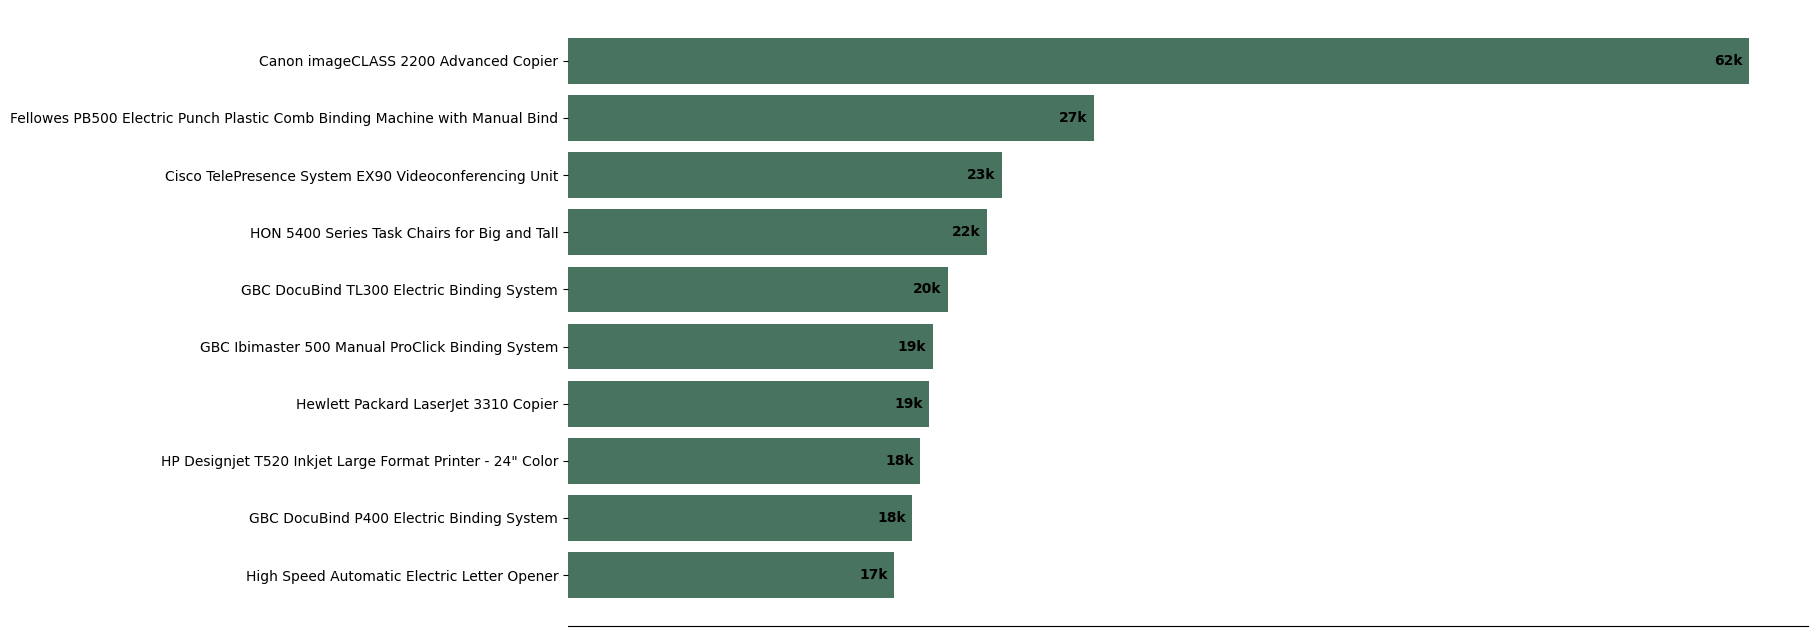

In [63]:
# @title Texto de título padrão
fig, ax = plt.subplots(figsize = (16,8))

ax.barh(top_itens['Product Name'].values,
                top_itens['Sales'].values,
                        align= 'center',
                                color= '#48735F'
        )

for i in np.arange(0,n):
        ax.annotate('{:,.0f}k'.format(top_itens['Sales'].values[i]/1000),
                (top_itens['Sales'].values[i],
                        i),
                        ha='center',
                                va='top',
                                        xytext=(-15,5),
                                                textcoords='offset points',
                                                        fontsize = 10,
                                                                fontweight = 'bold'
)



ax.invert_yaxis()

ax.xaxis.set_visible(False)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

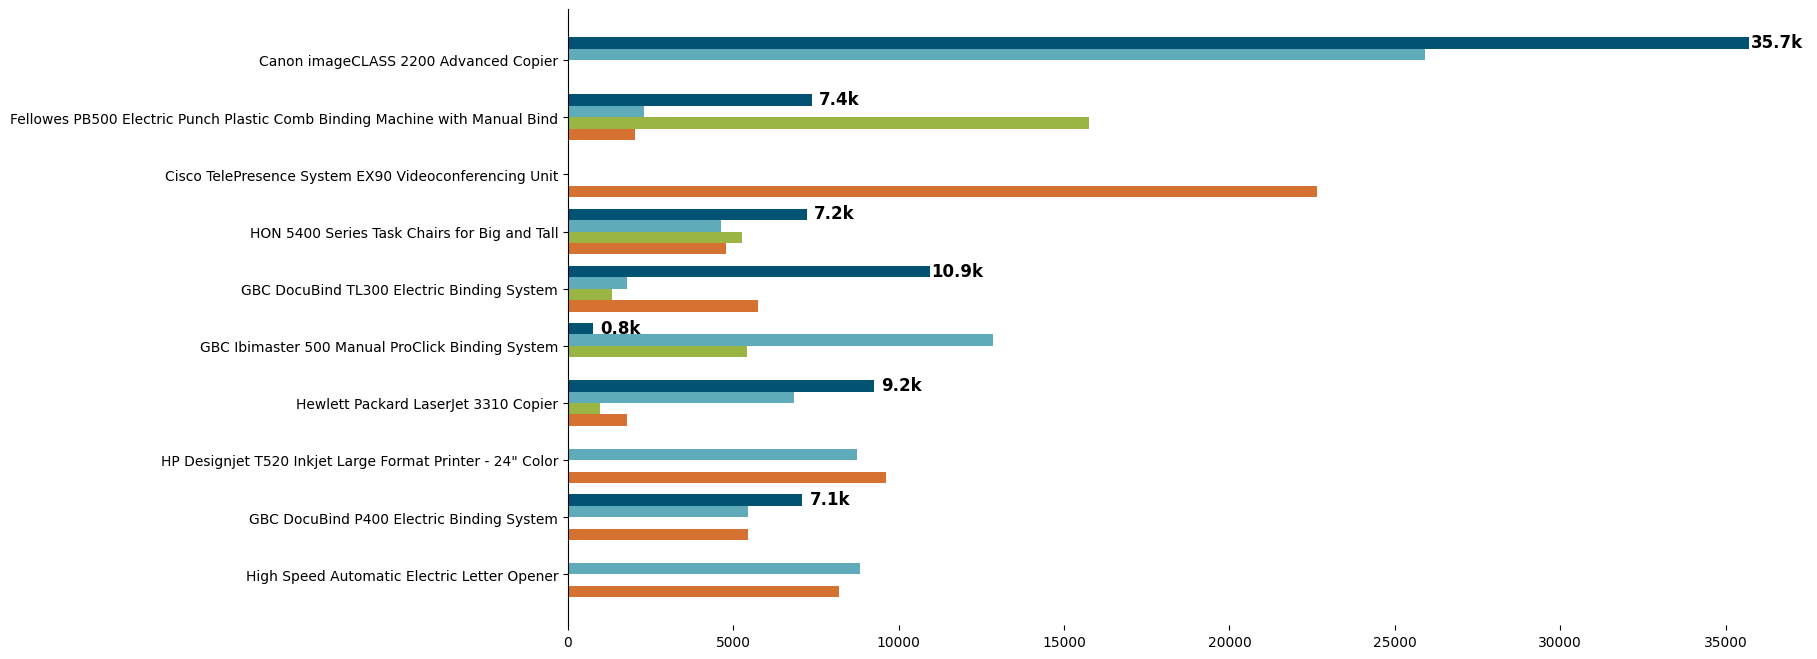

In [64]:
# @title Texto de título padrão
fig, ax = plt.subplots(figsize = (16,8))

hgt = 0.2
qtd_itens = len(top_itens)

ax.barh(np.arange(0, qtd_itens)-hgt-hgt/2,
                itens_grafico[itens_grafico.Ano == 2018].Sales_y.values,
                        align= 'center',
                                color= '#025373',
                                        height=hgt,
                                                label = 2018
        )

ax.barh(np.arange(0, qtd_itens)-hgt/2,
                itens_grafico[itens_grafico.Ano == 2017].Sales_y.values,
                        align= 'center',
                                color= '#60ABB9',
                                        height=hgt,
                                                label = 2017
        )

ax.barh(np.arange(0, qtd_itens)+hgt/2,
                itens_grafico[itens_grafico.Ano == 2016].Sales_y.values,
                        align= 'center',
                                color= '#9BB544',
                                        height=hgt,
                                                label = 2016
        )

ax.barh(np.arange(0, qtd_itens)+hgt+hgt/2,
                itens_grafico[itens_grafico.Ano == 2015].Sales_y.values,
                        align= 'center',
                                color= '#D67231',
                                        height=hgt,
                                                label = 2015
        )

for i in np.arange(0,qtd_itens):
                ax.annotate('{:,.1f}k'.format(itens_grafico[itens_grafico.Ano == 2018].Sales_y.values[i]/1000),
                        (itens_grafico[itens_grafico.Ano == 2018].Sales_y.values[i],i-hgt-hgt/2),
                                ha="center", va="top",
                                        xytext=(20,7),
                                                textcoords="offset points",
                                                        fontsize=12,
                                                                fontweight='bold'
                )

ax.yaxis.set_ticks(np.arange(0,qtd_itens)) # Ajustando os valores de x
ax.set_yticklabels(top_itens["Product Name"]) # Colocando rótulo no meu eixo
ax.tick_params(axis='y',labelsize=10)

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.invert_yaxis()

plt.show()